In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
#Needs a 8-bit image

In [4]:
input_data_folder = os.path.join("test_data", "input", "BA") 
input_image_name = "mask0270.tif" #8-bit image
input_image_no_extension = os.path.splitext(input_image_name)[0]
input_image = os.path.join(input_data_folder, input_image_name)

output_data_folder = os.path.join("test_data", "output")
output_image = os.path.join(output_data_folder, input_image_no_extension+"-bbox"+".png")
output_masks = os.path.join(output_data_folder, "individual_masks")

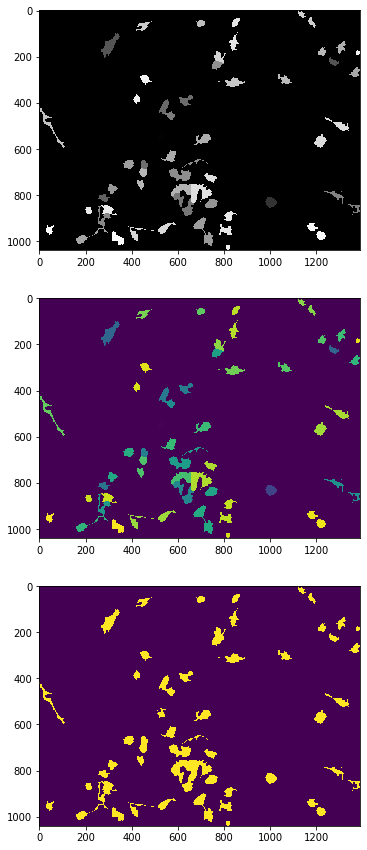

In [5]:
image = cv2.imread(input_image)
original = image.copy()

grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, binary) = cv2.threshold(grayImage, 1, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(10, 15))
fig.add_subplot(3,1,1)
plt.imshow(image)
fig.add_subplot(3,1,2)
plt.imshow(grayImage)
fig.add_subplot(3,1,3)
plt.imshow(binary)

plt.show()

Number of cells segmented: 25


True

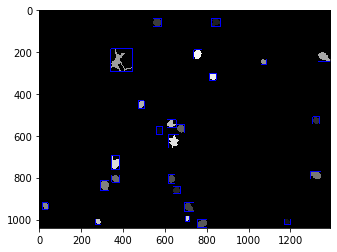

In [108]:
cnts = cv2.findContours(grayImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
idx=0
for c in cnts:
    idx += 1
    x,y,w,h = cv2.boundingRect(c)
    roi=image[y:y+h,x:x+w]
    roi_path = os.path.join(output_masks, str(idx) + '.png')
    cv2.imwrite(roi_path, roi)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)

print("Number of cells segmented: " + str(idx))
plt.imshow(image)
cv2.imwrite(output_image, image)